In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_articles = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
df_tran = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
df_cust = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")

In [3]:
for i in df_articles.columns:
    print(i,len(df_articles[i].unique()) )

article_id 105542
product_code 47224
prod_name 45875
product_type_no 132
product_type_name 131
product_group_name 19
graphical_appearance_no 30
graphical_appearance_name 30
colour_group_code 50
colour_group_name 50
perceived_colour_value_id 8
perceived_colour_value_name 8
perceived_colour_master_id 20
perceived_colour_master_name 20
department_no 299
department_name 250
index_code 10
index_name 10
index_group_no 5
index_group_name 5
section_no 57
section_name 56
garment_group_no 21
garment_group_name 21
detail_desc 43405


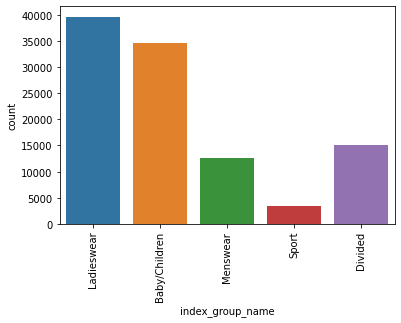

In [4]:
ax = sns.countplot(x="index_group_name", data = df_articles)
a = plt.xticks(rotation=90)

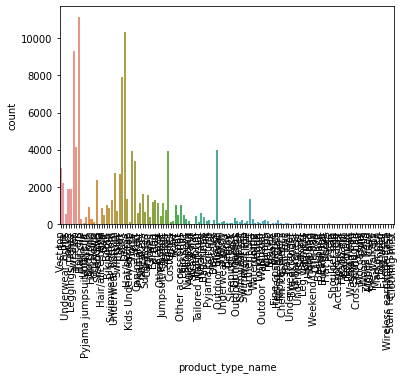

In [5]:
ax = sns.countplot(x="product_type_name", data = df_articles)
a = plt.xticks(rotation=90)

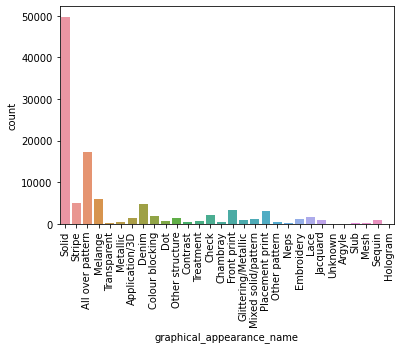

In [6]:
ax = sns.countplot(x="graphical_appearance_name", data = df_articles)
a = plt.xticks(rotation=90)